### 2.3.7 カーネル法を用いたサポートベクタマシン

次の教師あり学習モデルは、カーネル法を用いたサポートベクターマシンだ。線形サポートベクターマシンを用いたクラス分類については、**「2.3.3.5 クラス分類のための線形モデル」**で説明した。カーネル法を用いたサポートベクタマシン（ただのSVMtも呼ばれる）は、入力空間の超平面のような簡単なモデルではなく、より複雑なモデルを可能にするために線形サポートベクタマシンを拡張したものである。サポートベクタマシンは、クラス分類にも回帰にも利用できるが、ここではSVCとして実装されているクラス分類についてだけ議論する。同じ議論が、SVRとして実装されているサポートベクタを用いた回帰にも適用できる。

カーネル法用いたサポートベクタマシンの背後にある数学はかなり難しく、本書の範囲を超える。詳細が知りたければ、Hastie、Tibshirami、Friedmanの『*The Elements of Statistical Learning*』

#### 2.3.7.1 線形モデルと非線形特徴量

**図2-15**で説明したように、低次元における線形モデルは非常に制約が強い、直線や超平面が柔軟性を制限するからだ。線形モデルを柔軟にする方法の一つが、特徴量を追加することだ。例えば、入力特徴量の交互作用（積）や多項式項を加えることが考えられる。

**「2.3.5.4 決定木の特徴量の重要性」**で用いた合成データセットを見てみよう。（**図2-29**）

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 1')

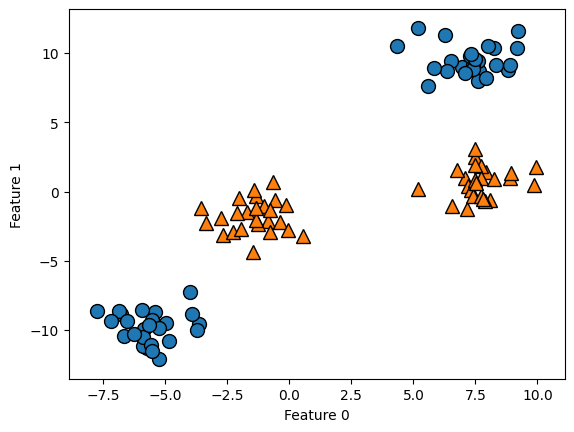

In [18]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-36 線形分離が不可能な２クラス分類データセット**

線形モデルによるクラス分類では、直線で分離することしかできないので、このようなデータセットではうまくいかない（**図2-37**）。

Text(0, 0.5, 'Feature 1')

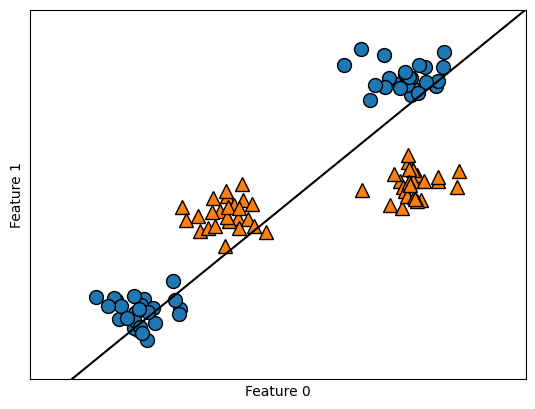

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-37 線形SVMで見つかった決定境界**

ここで入力特徴量を拡張してみよう。例えば、feature1 ** 2、つまり２番目の特徴量の２乗を新しい特徴量として加えてみる。これrで、データポイントは（feature0, feature1）の２次元の点ではなく、（feature0, feature1, feature1 ** 2）の３次元の点になる。[^hoge] と[^hoge]: 新しい表現を３次元散布図にしたものを**図2-38**に示す。

C:\Users\seiji\AppData\Local\Temp\ipykernel_19200\403655895.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
C:\Users\seiji\AppData\Local\Temp\ipykernel_19200\403655895.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


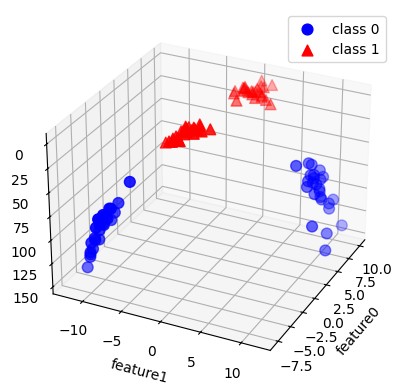

In [20]:
# ２番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
# y == 0の点をプロットしてからy == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.legend(["class 0", "class 1"], loc="best")

plt.show()



**図2-38 図2-37のデータセットを拡張したもの。feature1から３番目の特徴量を作っている**

この新しい表現では、２つのクラスを線形モデルで、つまり３次元空間内の平面を用いて分類することが可能になっている。この拡張されたデータセットに対して線形モデルを適用すればわかる（**図2-39**）。